In [116]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
from astropy import units as u
import itertools as it
import os

In [2]:
with open("/Users/snorris/manyTDE/data/sources/ASASSN-14ae.json") as f:
    data = json.load(f)

In [3]:
print(data)


{'name': 'ASASSN-14ae', 'catalog_version': 'v0.4', 'catalog_creation_date': 'June-2024', 'ra': 167.1671635, 'dec': 34.09784698, 'z': 0.0436029, 'peak_year': 2014.07374388, 'peak_mjd': 56684.91651619998, 'peak_limit': True, 'spectral_type': 'H', 'spectral_subtype': '->H+He', 'paper_ref': '2014MNRAS.445.3263H', 'nickname': 'ASASSN-14ae', 'extinction': {'note': '\nExinction due to Galatic absorption to be applied to the TDE light.\nE(B-V) based on from maps of Schlegel, Finkbeiner & Davis (1998).\nWe use a blackbody with T=3e4K to find the linear extinction in each optical/UV band (similar to A_nu), \nwe also give the ratio of total-to-selective extinction (R_nu)\n', 'e_bv': 0.014917281092303657, 'linear_extinction': {'FUV': 0.8929992780130005, 'NUV': 0.8921094800776839, 'u.sdss': 0.9345621809637065, 'g.sdss': 0.9483277753943016, 'r.sdss': 0.9629308756570525, 'i.sdss': 0.9713945287592197, 'z.sdss': 0.9790472281429085, 'F150LP': 0.8954700171872065, 'F125LP': 0.8851856663113998, 'F225W': 0.

In [117]:
os.listdir("/Users/snorris/manyTDE/data/sources/")

['AT2020pj.json',
 'ASASSN-14li.json',
 'AT2021uvz.json',
 'AT2019azh.json',
 'PTF-09ge.json',
 'AT2020acka.json',
 'AT2021axu.json',
 'PS1-10jh.json',
 'AT2020abri.json',
 'AT2020wey.json',
 'AT2020yue.json',
 'AT2018bsi.json',
 'AT2020neh.json',
 'AT2020vwl.json',
 'AT2022pna.json',
 'AT2021jsg.json',
 'AT2023mfm.json',
 'AT2021nwa.json',
 'AT2018lni.json',
 'AT2019mha.json',
 'AT2021sdu.json',
 'OGLE16aaa.json',
 'AT2021ehb.json',
 'PTF-09axc.json',
 'AT2021yte.json',
 'AT2021lo.json',
 'AT2022exr.json',
 'AT2018fyk.json',
 'AT2022bdw.json',
 'AT2020ddv.json',
 'AT2022wtn.json',
 'SDSS-TDE1.json',
 'AT2020vdq.json',
 'AT2023cvb.json',
 'AT2021ack.json',
 'AT2021jjm.json',
 'GALEX-D1-9.json',
 'AT2021uqv.json',
 'AT2019ahk.json',
 'AT2022gri.json',
 'AT2021utq.json',
 'AT2021gje.json',
 'AT2021crk.json',
 'AT2022rz.json',
 'GALEX-D3-13.json',
 'AT2019ehz.json',
 'AT2018iih.json',
 'iPTF-15af.json',
 'AT2020qhs.json',
 'AT2019dsg.json',
 'AT2023rvb.json',
 'AT2019cmw.json',
 'AT2018hc

In [4]:
data.keys()

dict_keys(['name', 'catalog_version', 'catalog_creation_date', 'ra', 'dec', 'z', 'peak_year', 'peak_mjd', 'peak_limit', 'spectral_type', 'spectral_subtype', 'paper_ref', 'nickname', 'extinction', 'host', 'lightcurve'])

In [5]:
data['z']

0.0436029

In [6]:
data['lightcurve']

{'note': '\nThe flux is not corrected for Galactic extinction, but the extinction correction \nper band is provided in this dataframe (under the "extinction" key). \nMJD is as observed (ie, no correction for time dilation)\n',
 'filters': ['B.uvot',
  'U.uvot',
  'UVM2.uvot',
  'UVW1.uvot',
  'UVW2.uvot',
  'W1.wise',
  'W2.wise'],
 'frequency_Hz': [695280559412463.5,
  872815357550259.6,
  1346484181597652.0,
  1198891057872408.0,
  1492659946412262.2,
  89917740678395.33,
  65429370473910.305],
 'uvot_aperture_arcsec': 7.0,
 'header': ['mjd', 'filter', 'flux_Jy', 'e_flux_Jy'],
 'dtype': [['mjd', '<f8'],
  ['filter', '<U9'],
  ['flux_Jy', '<f8'],
  ['e_flux_Jy', '<f8']],
 'data': [[56684.904328,
   'UVW2.uvot',
   0.0007585775750291819,
   3.294460549307236e-05],
  [56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05],
  [56697.737048, 'UVW2.uvot', 0.00038018939632055966, 1.651141569001475e-05],
  [56702.769059, 'UVW2.uvot', 0.0003162277660168379, 2.06003960708558

In [7]:
data['lightcurve'].keys()

dict_keys(['note', 'filters', 'frequency_Hz', 'uvot_aperture_arcsec', 'header', 'dtype', 'data'])

In [8]:
data['lightcurve']["data"]

[[56684.904328, 'UVW2.uvot', 0.0007585775750291819, 3.294460549307236e-05],
 [56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05],
 [56697.737048, 'UVW2.uvot', 0.00038018939632055966, 1.651141569001475e-05],
 [56702.769059, 'UVW2.uvot', 0.0003162277660168379, 2.06003960708558e-05],
 [56707.924694, 'UVW2.uvot', 0.00030760968147407045, 2.003897808663086e-05],
 [56729.155366, 'UVW2.uvot', 0.0001258925411794161, 8.201165392049745e-06],
 [56734.382344, 'UVW2.uvot', 0.00011587773561551166, 1.2581265288315157e-05],
 [56738.724766, 'UVW2.uvot', 0.00010864256236170688, 5.8978581666899015e-06],
 [56739.5944, 'UVW2.uvot', 0.00010471285480508899, 5.684526878273319e-06],
 [56744.218537, 'UVW2.uvot', 0.0001009252886076671, 7.670476787190517e-06],
 [56749.782639, 'UVW2.uvot', 9.727472237769639e-05, 1.1617615668258683e-05],
 [56755.51689, 'UVW2.uvot', 7.516228940182015e-05, 4.896385130163862e-06],
 [56760.188528, 'UVW2.uvot', 6.54636174067268e-05, 7.107621951291777e-06],
 [56763.

In [9]:
len(data['lightcurve']["data"])

169

In [10]:
fluxlist = []
for x in range (len(data['lightcurve']["data"])):
    fluxlist.append(data['lightcurve']["data"][x][2])
    peak = max(fluxlist)

In [11]:
peakL = 0.0009817479430199703*u.Jy
z = .0436029
peakL_date: 56684.91651619998


In [12]:
data['lightcurve']["data"][1]

[56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05]

In [13]:
data['lightcurve']["data"][1]

[56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05]

In [14]:
Mflux_listW2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW2.uvot':
        Mflux_listW2.append(data['lightcurve']["data"][i][2])
print(Mflux_listW2)

[0.0007585775750291819, 0.0006918309709189305, 0.00038018939632055966, 0.0003162277660168379, 0.00030760968147407045, 0.0001258925411794161, 0.00011587773561551166, 0.00010864256236170688, 0.00010471285480508899, 0.0001009252886076671, 9.727472237769639e-05, 7.516228940182015e-05, 6.54636174067268e-05, 6.792036326171802e-05, 6.486344335482348e-05, 3.5318316979195844e-05, 3.467368504525281e-05, 3.2210687912834015e-05, 3.104559588128311e-05, 1.905460717963252e-05, 1.485935642287009e-05, 2.187761623949534e-05, 8.629785477669701e-06, 7.5162289401820135e-06, 4.742419852602429e-06, 5.395106225151267e-06, 5.5975760149511155e-06, 1.887991349096277e-06]


In [15]:
MFflux_listW2 = u.Jy * np.array([0.0007585775750291819, 0.0006918309709189305, 0.00038018939632055966, 0.0003162277660168379, 0.00030760968147407045, 0.0001258925411794161, 0.00011587773561551166, 0.00010864256236170688, 0.00010471285480508899, 0.0001009252886076671, 9.727472237769639e-05, 7.516228940182015e-05, 6.54636174067268e-05, 6.792036326171802e-05, 6.486344335482348e-05, 3.5318316979195844e-05, 3.467368504525281e-05, 3.2210687912834015e-05, 3.104559588128311e-05, 1.905460717963252e-05, 1.485935642287009e-05, 2.187761623949534e-05, 8.629785477669701e-06, 7.5162289401820135e-06, 4.742419852602429e-06, 5.395106225151267e-06, 5.5975760149511155e-06, 1.887991349096277e-06])

In [16]:
print(MFflux_listW2)

[7.58577575e-04 6.91830971e-04 3.80189396e-04 3.16227766e-04
 3.07609681e-04 1.25892541e-04 1.15877736e-04 1.08642562e-04
 1.04712855e-04 1.00925289e-04 9.72747224e-05 7.51622894e-05
 6.54636174e-05 6.79203633e-05 6.48634434e-05 3.53183170e-05
 3.46736850e-05 3.22106879e-05 3.10455959e-05 1.90546072e-05
 1.48593564e-05 2.18776162e-05 8.62978548e-06 7.51622894e-06
 4.74241985e-06 5.39510623e-06 5.59757601e-06 1.88799135e-06] Jy


In [17]:
max(MFflux_listW2)

<Quantity 0.00075858 Jy>

In [18]:
MDate_listW2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW2.uvot':
        MDate_listW2.append(data['lightcurve']["data"][i][0])

In [19]:
MFDate_listW2 = np.array([56684.904328, 56687.036783, 56697.737048, 56702.769059, 56707.924694, 56729.155366, 56734.382344, 56738.724766, 56739.5944, 56744.218537, 56749.782639, 56755.51689, 56760.188528, 56763.518872, 56770.185083, 56794.686722, 56799.510924, 56804.443869, 56809.475482, 56814.673075, 56825.918021, 56828.748829, 57429.814596, 57435.334392, 57439.324256, 59590.743633, 59861.53967, 59891.567147])

In [20]:
print(len(MFDate_listW2))
print(len(MFflux_listW2))
peakW2_date = 56684.904328

28
28


In [21]:
MFADate_listW2 = MFDate_listW2 - 56684.904328
print(MFADate_listW2)

[0.00000000e+00 2.13245500e+00 1.28327200e+01 1.78647310e+01
 2.30203660e+01 4.42510380e+01 4.94780160e+01 5.38204380e+01
 5.46900720e+01 5.93142090e+01 6.48783110e+01 7.06125620e+01
 7.52842000e+01 7.86145440e+01 8.52807550e+01 1.09782394e+02
 1.14606596e+02 1.19539541e+02 1.24571154e+02 1.29768747e+02
 1.41013693e+02 1.43844501e+02 7.44910268e+02 7.50430064e+02
 7.54419928e+02 2.90583931e+03 3.17663534e+03 3.20666282e+03]


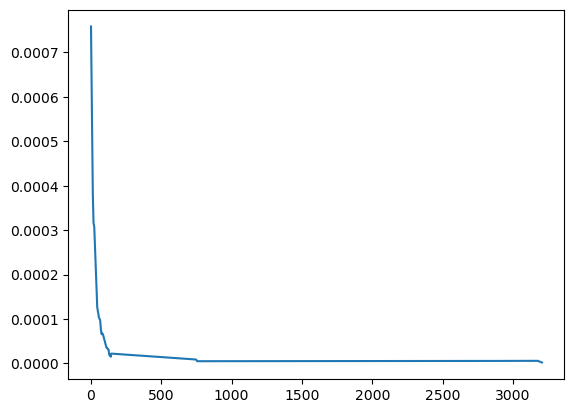

In [22]:
plt.plot(MFADate_listW2,MFflux_listW2)

In [23]:
MFMag_listW2 = u.Magnitude(MFflux_listW2.to(u.AB)) 
print(MFMag_listW2)
print(MFflux_listW2)
print(MFADate_listW2)

[16.7  16.8  17.45 17.65 17.68 18.65 18.74 18.81 18.85 18.89 18.93 19.21
 19.36 19.32 19.37 20.03 20.05 20.13 20.17 20.7  20.97 20.55 21.56 21.71
 22.21 22.07 22.03 23.21] mag(AB)
[7.58577575e-04 6.91830971e-04 3.80189396e-04 3.16227766e-04
 3.07609681e-04 1.25892541e-04 1.15877736e-04 1.08642562e-04
 1.04712855e-04 1.00925289e-04 9.72747224e-05 7.51622894e-05
 6.54636174e-05 6.79203633e-05 6.48634434e-05 3.53183170e-05
 3.46736850e-05 3.22106879e-05 3.10455959e-05 1.90546072e-05
 1.48593564e-05 2.18776162e-05 8.62978548e-06 7.51622894e-06
 4.74241985e-06 5.39510623e-06 5.59757601e-06 1.88799135e-06] Jy
[0.00000000e+00 2.13245500e+00 1.28327200e+01 1.78647310e+01
 2.30203660e+01 4.42510380e+01 4.94780160e+01 5.38204380e+01
 5.46900720e+01 5.93142090e+01 6.48783110e+01 7.06125620e+01
 7.52842000e+01 7.86145440e+01 8.52807550e+01 1.09782394e+02
 1.14606596e+02 1.19539541e+02 1.24571154e+02 1.29768747e+02
 1.41013693e+02 1.43844501e+02 7.44910268e+02 7.50430064e+02
 7.54419928e+02 2.90583

(-5.0, 200.0)

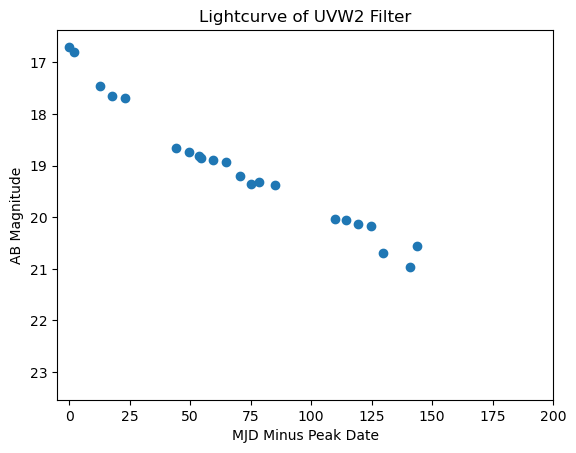

In [24]:
plt.scatter(MFADate_listW2,MFMag_listW2)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of UVW2 Filter")
plt.xlim(-5,200)

[0.0008550667128846805, 0.0008394599865193963, 0.0005345643593969647, 0.0004613175745603772, 0.00038018939632055966, 0.0001445439770745928, 0.00014588142602753413, 0.00010665961212302457, 0.00010665961212302457, 9.817479430199703e-05, 8.09095899178378e-05, 6.792036326171802e-05, 4.017908108489358e-05, 6.251726927756797e-05, 3.908408957923977e-05, 5.011872336272714e-05, 2.4210290467361603e-05, 2.6302679918953702e-05, 3.019951720402019e-05, 2.228435149270298e-05, 3.076096814740705e-05, 1.541700452949555e-05, 2.187761623949534e-05, 2.5822601906345904e-06, 2.6302679918953707e-06, 5.970352865838317e-06, 1.137627285823424e-05, 1.0864256236170688e-06, 1.7060823890031207e-05, 4.285485203974374e-06, 6.251726927756797e-06]


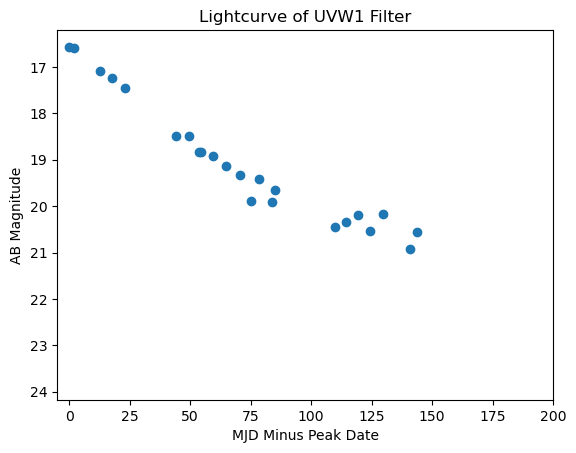

In [25]:
Mflux_listW1 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW1.uvot':
        Mflux_listW1.append(data['lightcurve']["data"][i][2])
MDate_listW1 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW1.uvot':
        MDate_listW1.append(data['lightcurve']["data"][i][0])
MFflux_listW1 = u.Jy * np.array(Mflux_listW1)
MFDate_listW1 = np.array(MDate_listW1)
MFMag_listW1 = u.Magnitude(MFflux_listW1.to(u.AB)) 
MFADate_listW1 = MFDate_listW1 - MFDate_listW1[0]
plt.scatter(MFADate_listW1,MFMag_listW1)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of UVW1 Filter")
plt.xlim(-5,200)
print(Mflux_listW1)

(-5.0, 200.0)

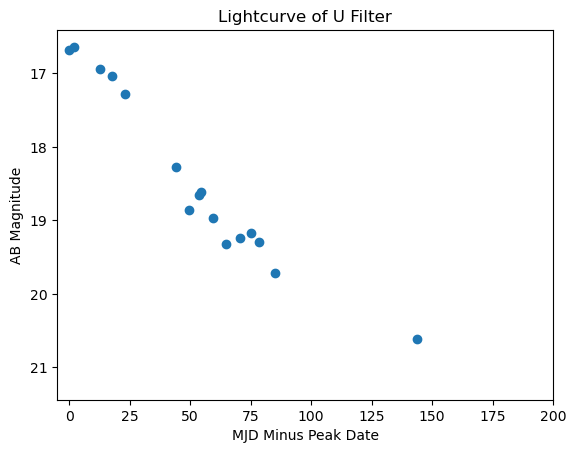

In [26]:
Mflux_listU = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'U.uvot':
        Mflux_listU.append(data['lightcurve']["data"][i][2])
MDate_listU = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'U.uvot':
        MDate_listU.append(data['lightcurve']["data"][i][0])
MFflux_listU = u.Jy * np.array(Mflux_listU)
MFDate_listU = np.array(MDate_listU)
MFMag_listU = u.Magnitude(MFflux_listU.to(u.AB)) 
MFADate_listU = MFDate_listU - MFDate_listU[0]
plt.scatter(MFADate_listU,MFMag_listU)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of U Filter")
plt.xlim(-5,200)

(-5.0, 200.0)

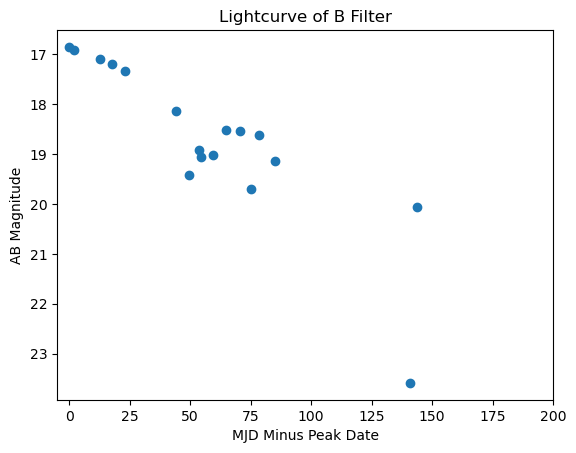

In [27]:
Mflux_listB = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'B.uvot':
        Mflux_listB.append(data['lightcurve']["data"][i][2])
MDate_listB = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'B.uvot':
        MDate_listB.append(data['lightcurve']["data"][i][0])
MFflux_listB = u.Jy * np.array(Mflux_listB)
MFDate_listB = np.array(MDate_listB)
MFMag_listB = u.Magnitude(MFflux_listB.to(u.AB)) 
MFADate_listB = MFDate_listB - MFDate_listB[0]
plt.scatter(MFADate_listB,MFMag_listB)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of B Filter")
plt.xlim(-5,200)

(-5.0, 200.0)

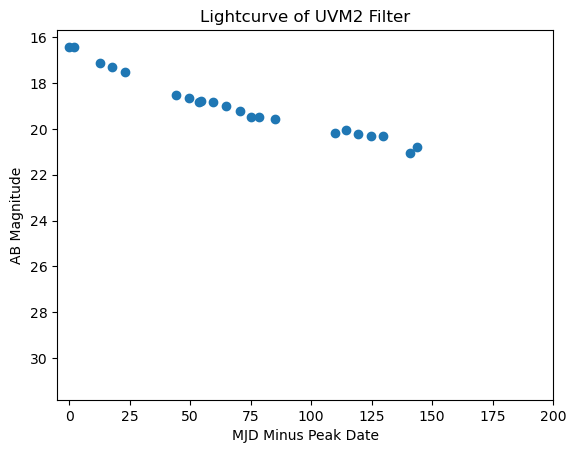

In [28]:
Mflux_listM2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVM2.uvot':
        Mflux_listM2.append(data['lightcurve']["data"][i][2])
MDate_listM2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVM2.uvot':
        MDate_listM2.append(data['lightcurve']["data"][i][0])
MFflux_listM2 = u.Jy * np.array(Mflux_listM2)
MFDate_listM2 = np.array(MDate_listM2)
MFMag_listM2 = u.Magnitude(MFflux_listM2.to(u.AB)) 
MFADate_listM2 = MFDate_listM2 - MFDate_listM2[0]
plt.scatter(MFADate_listM2,MFMag_listM2)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of UVM2 Filter")
plt.xlim(-5,200)

(25.0, 15.686500000000013)

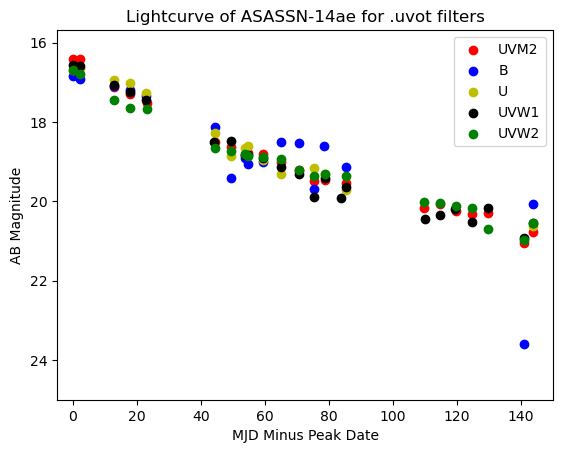

In [29]:
plt.scatter(MFADate_listM2,MFMag_listM2,c = 'r', label = 'UVM2')
plt.scatter(MFADate_listB,MFMag_listB,c = 'b', label = 'B')
plt.scatter(MFADate_listU,MFMag_listU,c = 'y', label = 'U')
plt.scatter(MFADate_listW1,MFMag_listW1,c = 'k', label = 'UVW1')
plt.scatter(MFADate_listW2,MFMag_listW2,c = 'g', label = 'UVW2')
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.legend()
plt.title("Lightcurve of ASASSN-14ae for .uvot filters")
plt.xlim(-5,150)
plt.ylim(25)

In [30]:
Mer_listB = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'B.uvot':
        Mer_listB.append(data['lightcurve']["data"][i][3])
Mer_listM2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVM2.uvot':
        Mer_listM2.append(data['lightcurve']["data"][i][3])
Mer_listU = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'U.uvot':
        Mer_listU.append(data['lightcurve']["data"][i][3])
Mer_listW1 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW1.uvot':
        Mer_listW1.append(data['lightcurve']["data"][i][3])
Mer_listW2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW2.uvot':
        Mer_listW2.append(data['lightcurve']["data"][i][3])
MFer_listM2 = u.Jy * np.array(Mer_listM2)
MFMager_listM2 = u.Magnitude(MFer_listM2.to(u.AB)) 
MFer_listB = u.Jy * np.array(Mer_listB)
MFMager_listB = u.Magnitude(MFer_listB.to(u.AB)) 
MFer_listW2 = u.Jy * np.array(Mer_listW2)
MFMager_listW2 = u.Magnitude(MFer_listW2.to(u.AB)) 
MFer_listW1 = u.Jy * np.array(Mer_listW1)
MFMager_listW1 = u.Magnitude(MFer_listW1.to(u.AB)) 
MFer_listU = u.Jy * np.array(Mer_listU)
MFMager_listU = u.Magnitude(MFer_listU.to(u.AB)) 
print(MFer_listM2)

[4.26367714e-05 4.26367714e-05 2.21709504e-05 2.36970522e-05
 2.68424628e-05 9.41619775e-06 1.53150001e-05 6.94825215e-06
 6.06309432e-06 8.25700143e-06 1.07923745e-05 5.71244932e-06
 7.00030569e-06 5.18578261e-06 5.96656423e-06 4.38195257e-06
 3.35711972e-06 3.47629805e-06 3.52294259e-06 3.92344593e-06
 4.04657957e-06 3.10344678e-06 2.14751181e-06 1.86626628e-06
 2.41058427e-06 3.12671347e-06 3.44227509e-06 2.50543045e-06
 1.97146434e-06 4.27837239e-06 9.43609234e-06] Jy


In [31]:
ptimeM2 = MFADate_listM2*np.sqrt(1-z**2)
ptimeB = MFADate_listB*np.sqrt(1-z**2)
ptimeU = MFADate_listU*np.sqrt(1-z**2)
ptimeW1 = MFADate_listW1*np.sqrt(1-z**2)
ptimeW2 = MFADate_listW2*np.sqrt(1-z**2)
print(ptimeM2)
print(MFADate_listM2)

[0.00000000e+00 2.12197496e+00 1.28152314e+01 1.78390269e+01
 2.29885287e+01 4.42002170e+01 4.94208791e+01 5.37646470e+01
 5.46337606e+01 5.92492199e+01 6.48072049e+01 7.05366806e+01
 7.52052183e+01 7.85307665e+01 8.51907205e+01 1.09672338e+02
 1.14487389e+02 1.19414471e+02 1.24446907e+02 1.29636285e+02
 1.40870771e+02 1.43701324e+02 4.09321998e+02 4.37142465e+02
 4.77227266e+02 7.44192588e+02 7.49706162e+02 7.53695491e+02
 2.90307052e+03 3.17360636e+03 3.73121488e+03]
[0.00000000e+00 2.12399500e+00 1.28274310e+01 1.78560090e+01
 2.30104130e+01 4.42422940e+01 4.94679260e+01 5.38158290e+01
 5.46857700e+01 5.93056230e+01 6.48688990e+01 7.06038290e+01
 7.52768110e+01 7.86055250e+01 8.52718190e+01 1.09776742e+02
 1.14596377e+02 1.19528149e+02 1.24565376e+02 1.29759694e+02
 1.41004875e+02 1.43838122e+02 4.09711658e+02 4.37558609e+02
 4.77681569e+02 7.44901033e+02 7.50419855e+02 7.54412982e+02
 2.90583414e+03 3.17662752e+03 3.73476686e+03]


In [32]:
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
print(Ho)
print(c)
sol = c.to(u.km/u.s)
print(sol)
print(z)

69.32 km / (Mpc s)
  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
299792.458 km / s
0.0436029


In [33]:
d = (sol*z)/Ho
print(d)
dpc = d.to(u.pc)
print(dpc)

188.5721374340479 Mpc
188572137.4340479 pc


In [34]:
dm = (5*np.log10(dpc/(10*u.pc)))
print(dm)

36.377387618767884


In [35]:
zero_point_star_equiv = u.zero_point_flux(3631.1 * u.Jy)
print(u.Magnitude(MFMag_listM2.to(u.AB, zero_point_star_equiv)))
print(MFMag_listM2)

[16.42 16.42 17.13 17.3  17.53 18.5  18.63 18.83 18.78 18.81 19.01 19.21
 19.48 19.46 19.55 20.17 20.06 20.24 20.32 20.29 21.05 20.77 21.61 22.37
 21.69 21.33 21.34 21.61 22.23 31.09 22.48] mag(AB)
[16.42 16.42 17.13 17.3  17.53 18.5  18.63 18.83 18.78 18.81 19.01 19.21
 19.48 19.46 19.55 20.17 20.06 20.24 20.32 20.29 21.05 20.77 21.61 22.37
 21.69 21.33 21.34 21.61 22.23 31.09 22.48] mag(AB)


In [36]:
AbsMagM2 = MFMag_listM2.value - dm
AbsMagU = MFMag_listU.value - dm
AbsMagW2 = MFMag_listW2.value - dm
AbsMagW1 = MFMag_listW1.value - dm
AbsMagB = MFMag_listB.value - dm

(-10.0, -20.69088761876787)

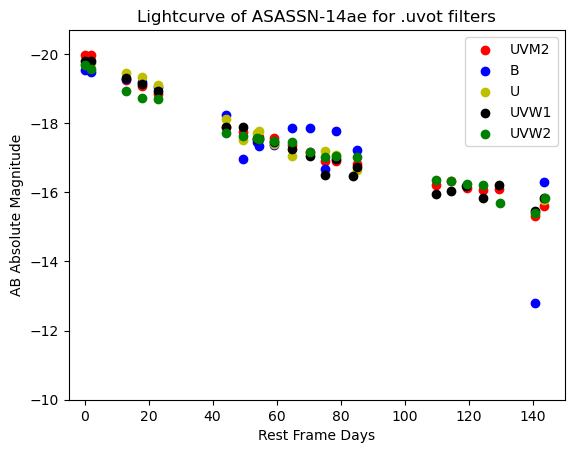

In [37]:
plt.scatter(ptimeM2,AbsMagM2,c = 'r', label = 'UVM2')
plt.scatter(ptimeB,AbsMagB,c = 'b', label = 'B')
plt.scatter(ptimeU,AbsMagU,c = 'y', label = 'U')
plt.scatter(ptimeW1,AbsMagW1,c = 'k', label = 'UVW1')
plt.scatter(ptimeW2,AbsMagW2,c = 'g', label = 'UVW2')
plt.gca().invert_yaxis()
plt.xlabel("Rest Frame Days")
plt.ylabel("AB Absolute Magnitude")
plt.legend()
plt.title("Lightcurve of ASASSN-14ae for .uvot filters")
plt.xlim(-5,150)
plt.ylim(-10)


In [38]:
MFer_listM2 = u.Jy * np.array(Mer_listM2)
MFMager_listM2 = u.Magnitude(MFer_listM2.to(u.AB)) 
MFer_listB = u.Jy * np.array(Mer_listB)
MFMager_listB = u.Magnitude(MFer_listB.to(u.AB)) 
MFer_listW2 = u.Jy * np.array(Mer_listW2)
MFMager_listW2 = u.Magnitude(MFer_listW2.to(u.AB)) 
MFer_listW1 = u.Jy * np.array(Mer_listW1)
MFMager_listW1 = u.Magnitude(MFer_listW1.to(u.AB)) 
MFer_listU = u.Jy * np.array(Mer_listU)
MFMager_listU = u.Magnitude(MFer_listU.to(u.AB)) 
print(MFMager_listM2)
print(MFer_listM2)
print(MFMag_listM2)

[19.82553922 19.82553922 20.53553922 20.46326419 20.3279441  21.46531107
 20.93720749 21.79531107 21.94326419 21.6079441  21.31720749 22.0079441
 21.78720749 22.11296423 21.9606892  22.29583082 22.58508293 22.54720749
 22.53273608 22.41583082 22.38227979 22.67038924 23.0701611  23.22256597
 22.94469421 22.66227979 22.55788606 22.90279412 23.16302768 22.32180354
 21.46301954] mag(AB)
[4.26367714e-05 4.26367714e-05 2.21709504e-05 2.36970522e-05
 2.68424628e-05 9.41619775e-06 1.53150001e-05 6.94825215e-06
 6.06309432e-06 8.25700143e-06 1.07923745e-05 5.71244932e-06
 7.00030569e-06 5.18578261e-06 5.96656423e-06 4.38195257e-06
 3.35711972e-06 3.47629805e-06 3.52294259e-06 3.92344593e-06
 4.04657957e-06 3.10344678e-06 2.14751181e-06 1.86626628e-06
 2.41058427e-06 3.12671347e-06 3.44227509e-06 2.50543045e-06
 1.97146434e-06 4.27837239e-06 9.43609234e-06] Jy
[16.42 16.42 17.13 17.3  17.53 18.5  18.63 18.83 18.78 18.81 19.01 19.21
 19.48 19.46 19.55 20.17 20.06 20.24 20.32 20.29 21.05 20.77 21.

In [39]:
-2.5*np.log10(4.26367714e-05/3631.1)

19.825634746166326

In [40]:
ErMagM2 = ((MFer_listM2/MFflux_listM2))
FErMagM2 = (np.abs(ErMagM2*AbsMagM2))
print(ErMagM2)

[4.34294482e-02 4.34294482e-02 4.34294482e-02 5.42868102e-02
 7.60015343e-02 6.51441723e-02 1.19430983e-01 6.51441723e-02
 5.42868102e-02 7.60015343e-02 1.19430983e-01 7.60015343e-02
 1.19430983e-01 8.68588964e-02 1.08573620e-01 1.41145707e-01
 9.77162584e-02 1.19430983e-01 1.30288345e-01 1.41145707e-01
 2.93148775e-01 1.73717793e-01 2.60576689e-01 4.56009206e-01
 3.14863499e-01 2.93148775e-01 3.25720861e-01 3.04006137e-01
 4.23437120e-01 3.21572263e+03 2.55148008e+00]


(-10.0, -30.0)

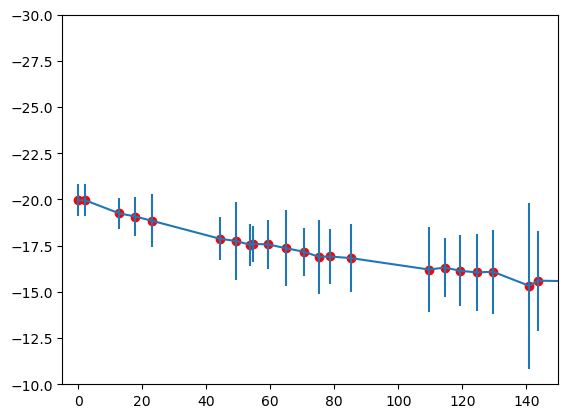

In [41]:
plt.scatter(ptimeM2,AbsMagM2,c = 'r', label = 'UVM2')
plt.errorbar(ptimeM2,AbsMagM2,FErMagM2)
plt.xlim(-5,150)
plt.ylim(-10,-30)

In [42]:
e_M2mag   = np.sqrt((2.5/np.log(10))*(MFer_listM2/MFflux_listM2)**2)
e_W2mag   = np.sqrt((2.5/np.log(10))*(MFer_listW2/MFflux_listW2)**2)
e_Bmag   = np.sqrt((2.5/np.log(10))*(MFer_listB/MFflux_listB)**2)
e_Umag   = np.sqrt((2.5/np.log(10))*(MFer_listU/MFflux_listU)**2)
e_W1mag   = np.sqrt((2.5/np.log(10))*(MFer_listW1/MFflux_listW1)**2)

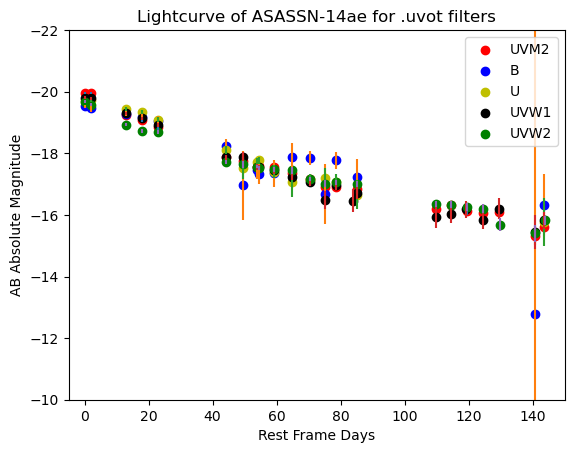

In [43]:
plt.scatter(ptimeM2,AbsMagM2,c = 'r', label = 'UVM2')
plt.errorbar(ptimeM2,AbsMagM2,yerr = e_M2mag,ls = 'none')
plt.scatter(ptimeB,AbsMagB,c = 'b', label = 'B')
plt.errorbar(ptimeB,AbsMagB,yerr = e_Bmag,ls = 'none')
plt.scatter(ptimeU,AbsMagU,c = 'y', label = 'U')
plt.errorbar(ptimeU,AbsMagU,yerr = e_Umag,ls = 'none')
plt.scatter(ptimeW1,AbsMagW1,c = 'k', label = 'UVW1')
plt.errorbar(ptimeW1,AbsMagW1,yerr = e_W1mag,ls = 'none')
plt.scatter(ptimeW2,AbsMagW2,c = 'g', label = 'UVW2')
plt.errorbar(ptimeW2,AbsMagW2,yerr = e_W2mag,ls = 'none')
plt.gca().invert_yaxis()
plt.xlabel("Rest Frame Days")
plt.ylabel("AB Absolute Magnitude")
plt.legend()
plt.title("Lightcurve of ASASSN-14ae for .uvot filters")
plt.xlim(-5,150)
plt.ylim(-10,-22)
plt.savefig('ASASSN-14ae_lightcurve_uvot.pdf')

In [44]:
print(AbsMagB)
print(e_Bmag)

[-19.52738762 -19.46738762 -19.28738762 -19.18738762 -19.03738762
 -18.23738762 -16.96738762 -17.45738762 -17.32738762 -17.35738762
 -17.86738762 -17.84738762 -16.67738762 -17.76738762 -17.23738762
 -12.78738762 -16.30738762 -14.07738762 -16.51738762 -16.29738762
 -16.22738762]
[ 0.05656613  0.11313226  0.07919259  0.10181904  0.1696984   0.2149513
  1.12000942  0.29414389  0.32808357  0.44121583  0.45252906  0.22626453
  0.97293747  0.28283066  0.56566132 33.89442642  1.00687715  6.53904488
  0.41858938  1.28970781  1.73092365]


(-10.0, -22.0)

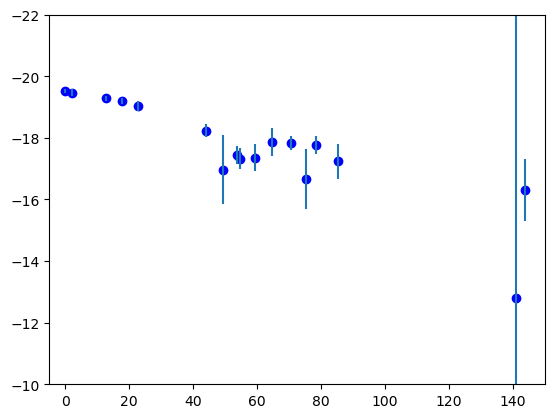

In [45]:
plt.scatter(ptimeB,AbsMagB,c = 'b', label = 'B')
plt.errorbar(ptimeB,AbsMagB,yerr = e_Bmag,ls = 'none')
plt.gca().invert_yaxis()
plt.xlim(-5,150)
plt.ylim(-10,-22)

In [46]:
print(MFer_listB)
print(MFflux_listB)

[3.58669398e-05 6.78772627e-05 4.02552344e-05 4.72026987e-05
 6.85197199e-05 4.15410932e-05 6.71984901e-05 2.77139014e-05
 2.74234644e-05 3.79130678e-05 6.21991302e-05 3.05319341e-05
 4.46912777e-05 3.54539256e-05 4.35205449e-05 4.32778950e-05
 3.28938211e-05 2.73937923e-05 1.65930432e-05 4.17473748e-05
 5.25310100e-05] Jy
[6.60693448e-04 6.25172693e-04 5.29663444e-04 4.83058802e-04
 4.20726628e-04 2.01372425e-04 6.25172693e-05 9.81747943e-05
 8.70963590e-05 8.95364766e-05 1.43218790e-04 1.40604752e-04
 4.78630092e-05 1.30617089e-04 8.01678063e-05 1.33045442e-06
 3.40408190e-05 4.36515832e-06 4.13047502e-05 3.37287309e-05
 3.16227766e-05] Jy


In [47]:
print(min(MFflux_listB))
print(max(AbsMagB))

1.3304544179780873e-06 Jy
-12.787387618767884


In [48]:
print(MFer_listB[15])
print(MFflux_listB[15])
print(AbsMagB[15])
print(e_Bmag[15])

4.3277895010161266e-05 Jy
1.3304544179780873e-06 Jy
-12.787387618767884
33.89442642367727


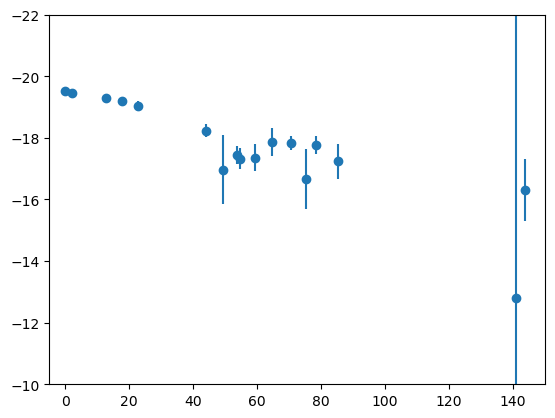

In [49]:
x = ptimeB
y = AbsMagB
y_err = e_Bmag
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_err, fmt='o')
plt.gca().invert_yaxis()
plt.xlim(-5,150)
plt.ylim(-10,-22)
plt.show()


In [50]:
print(MFer_listB[15]/MFflux_listB[15])

32.528656694553554


In [51]:
data.keys()

dict_keys(['name', 'catalog_version', 'catalog_creation_date', 'ra', 'dec', 'z', 'peak_year', 'peak_mjd', 'peak_limit', 'spectral_type', 'spectral_subtype', 'paper_ref', 'nickname', 'extinction', 'host', 'lightcurve'])

In [52]:
data.items()

dict_items([('name', 'ASASSN-14ae'), ('catalog_version', 'v0.4'), ('catalog_creation_date', 'June-2024'), ('ra', 167.1671635), ('dec', 34.09784698), ('z', 0.0436029), ('peak_year', 2014.07374388), ('peak_mjd', 56684.91651619998), ('peak_limit', True), ('spectral_type', 'H'), ('spectral_subtype', '->H+He'), ('paper_ref', '2014MNRAS.445.3263H'), ('nickname', 'ASASSN-14ae'), ('extinction', {'note': '\nExinction due to Galatic absorption to be applied to the TDE light.\nE(B-V) based on from maps of Schlegel, Finkbeiner & Davis (1998).\nWe use a blackbody with T=3e4K to find the linear extinction in each optical/UV band (similar to A_nu), \nwe also give the ratio of total-to-selective extinction (R_nu)\n', 'e_bv': 0.014917281092303657, 'linear_extinction': {'FUV': 0.8929992780130005, 'NUV': 0.8921094800776839, 'u.sdss': 0.9345621809637065, 'g.sdss': 0.9483277753943016, 'r.sdss': 0.9629308756570525, 'i.sdss': 0.9713945287592197, 'z.sdss': 0.9790472281429085, 'F150LP': 0.8954700171872065, 'F1

In [53]:
data.values()

dict_values(['ASASSN-14ae', 'v0.4', 'June-2024', 167.1671635, 34.09784698, 0.0436029, 2014.07374388, 56684.91651619998, True, 'H', '->H+He', '2014MNRAS.445.3263H', 'ASASSN-14ae', {'note': '\nExinction due to Galatic absorption to be applied to the TDE light.\nE(B-V) based on from maps of Schlegel, Finkbeiner & Davis (1998).\nWe use a blackbody with T=3e4K to find the linear extinction in each optical/UV band (similar to A_nu), \nwe also give the ratio of total-to-selective extinction (R_nu)\n', 'e_bv': 0.014917281092303657, 'linear_extinction': {'FUV': 0.8929992780130005, 'NUV': 0.8921094800776839, 'u.sdss': 0.9345621809637065, 'g.sdss': 0.9483277753943016, 'r.sdss': 0.9629308756570525, 'i.sdss': 0.9713945287592197, 'z.sdss': 0.9790472281429085, 'F150LP': 0.8954700171872065, 'F125LP': 0.8851856663113998, 'F225W': 0.8919831890818992, 'I.johnson': 0.9772412097022964, 'J': 0.9876316483799189, 'H': 0.9921727640612082, 'K': 0.9949070823534961, 'V.uvot': 0.9573537091176234, 'B.uvot': 0.94397

In [110]:
def filtercurve(lightfilter,redshift):
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    for i in range (len(data['lightcurve']["data"])):
        print(data['lightcurve']["data"][i][1]== lightfilter)
        if data['lightcurve']["data"][i][1] == lightfilter:
            flux_filter.append(data['lightcurve']["data"][i][2]))
            flux_filt
            mag_filter = u.Magnitude(flux_filter_array.to(u.AB)) 
            distance = (sol*redshift)/Ho
            distance_pc = d.to(u.pc)
            distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
            absMag_filter = mag_filter.value - distance_mod
            error_filter =  error_filter.append(data['lightcurve']["data"][i][3])
            flux_error_filter = u.Jy * np.array(error_filter)
            mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2)    
            mjd_date_filter= np.array(mjd_date_filter.append(data['lightcurve']["data"][i][0]))
            peak_date_filter = mjd_date_filter - mjd_date_filter[0]
            rest_time_filter = peak_date_filter*np.sqrt(1-redshift**2)
    lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='k.')
    return(lightcurve)
filtercurve('B.uvot',z)





False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


TypeError: unsupported operand type(s) for *: 'Unit' and 'NoneType'

[56684.933335 56687.035203 56697.734349 56702.838037 56707.882562
 56729.153817 56734.381401 56738.721707 56739.591213 56744.217014
 56749.781464 56755.515589 56760.186584 56763.517687 56770.183642
 56825.916657 56828.746368 57439.321695 59590.739923 59861.536337
 60419.67979 ]


(None, <ErrorbarContainer object of 3 artists>)

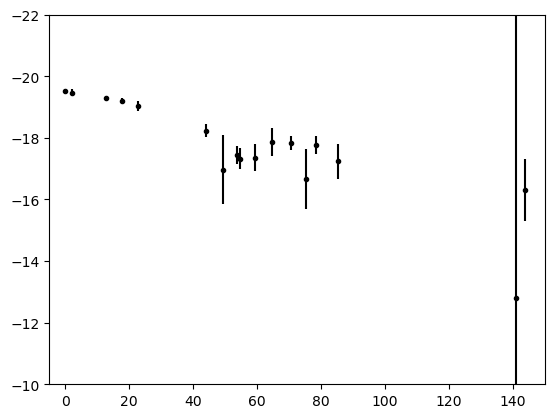

In [115]:
def filtercurve(lightfilter,redshift):
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    for i in range (len(data['lightcurve']["data"])):
        if data['lightcurve']["data"][i][1] == lightfilter:
            flux_filter.append(data['lightcurve']["data"][i][2])
            error_filter.append(data['lightcurve']["data"][i][3])
            mjd_date_filter.append(data['lightcurve']["data"][i][0])
    distance = (sol*redshift)/Ho
    distance_pc = d.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    flux_filter = u.Jy*np.array(flux_filter)
    mag_filter = u.Magnitude(flux_filter.to(u.AB))     
    absMag_filter = mag_filter.value - distance_mod
    flux_error_filter = u.Jy * np.array(error_filter)
    mjd_date_filter= np.array(mjd_date_filter)
    peak_date_filter = mjd_date_filter - mjd_date_filter[0]
    rest_time_filter = peak_date_filter*np.sqrt(1-redshift**2)
    mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2)    
    lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='k.')
    plt.gca().invert_yaxis()
    plt.xlim(-5,150)
    plt.ylim(-10,-22)
    return(print(mjd_date_filter),lightcurve)
filtercurve('B.uvot',z)

In [95]:
def filtercurve(lightfilter,redshift):
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    for i in range (len(data['lightcurve']["data"])):
        if data['lightcurve']["data"][i][1] == '{}'.format(lightfilter):
            flux_filter_array = np.array(u.Jy*flux_filter.append(data['lightcurve']["data"][i][2]))
            mag_filter = u.Magnitude(flux_filter_array.to(u.AB)) 
            distance = (sol*redshift)/Ho
            distance_pc = d.to(u.pc)
            distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
            absMag_filter = mag_filter.value - distance_mod
            error_filter =  error_filter.append(data['lightcurve']["data"][i][3])
            flux_error_filter = u.Jy * np.array(error_filter)
            mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2)    
            mjd_date_filter= np.array(mjd_date_filter.append(data['lightcurve']["data"][i][0]))
            peak_date_filter = mjd_date_filter - mjd_date_filter[0]
            rest_time_filter = peak_date_filter*np.sqrt(1-redshift**2)
            lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='k.')
            return(lightcurve)
filtercurve('B',z)